In [159]:
import pandas as pd
import matplotlib.pyplot as plt

In [160]:
df = pd.read_csv('data/parsed.csv')

In [161]:
df.parsed_place.unique()

array(['California', 'Dominican Republic', 'Alaska', 'Indonesia',
       'Canada', 'Puerto Rico', 'Montana', 'Nevada', 'Christmas Island',
       'Hawaii', 'Northern Mariana Islands', 'Japan', 'Ecuador',
       'Vanuatu', 'Mexico', 'Russia', 'British Virgin Islands',
       'Washington', 'Papua New Guinea', 'Fiji', 'U.S. Virgin Islands',
       'Chile', 'Peru', 'Yemen', 'Guatemala', 'Kansas', 'Australia',
       'Wyoming', 'Kuril Islands', 'Oklahoma', 'Tennessee',
       'Pacific-Antarctic Ridge', 'Utah', 'Colombia', 'Argentina',
       'Oregon', 'Greece', 'Missouri', 'Tajikistan',
       'Northern Mid-Atlantic Ridge', 'Sumatra', 'Solomon Islands',
       'Burma', 'Taiwan', 'Nicaragua',
       'South Georgia and South Sandwich Islands', 'Idaho', 'Kyrgyzstan',
       'Arizona', 'Tonga', 'Northern East Pacific Rise', 'South Africa',
       'Southern Mid-Atlantic Ridge', 'Costa Rica', 'China',
       'Philippines', 'Haiti', 'Jamaica', 'Kentucky', 'New Zealand',
       'Iran', 'Afghanistan

In [162]:
df.columns

Index(['alert', 'cdi', 'code', 'detail', 'dmin', 'felt', 'gap', 'ids', 'mag',
       'magType', 'mmi', 'net', 'nst', 'place', 'rms', 'sig', 'sources',
       'status', 'time', 'title', 'tsunami', 'type', 'types', 'tz', 'updated',
       'url', 'parsed_place'],
      dtype='object')

In [163]:
# separate the columns to work with
df_cols = ['mag', 'magType', 'parsed_place', 'tsunami', 'type']
df = df[df_cols]
df.head()

,mag,magType,parsed_place,tsunami,type
0,1.35,ml,California,0,earthquake
1,1.29,ml,California,0,earthquake
2,3.42,ml,California,0,earthquake
3,0.44,ml,California,0,earthquake
4,2.16,md,California,0,earthquake


> 
    1. Find the 95th percentile of earthquake magnitude in Japan using the mb magnitude type.

In [ ]:
df.describe(include='all')

,mag,magType,place,parsed_place,tsunami,type
count,9331.000000,9331,9332,9332,9332.000000,9332
unique,NaN,10,5433,110,NaN,5
top,NaN,ml,"10km NE of Aguanga, CA",Alaska,NaN,earthquake
freq,NaN,6803,306,3665,NaN,9081
mean,1.497345,NaN,NaN,NaN,0.006537,NaN
std,1.203347,NaN,NaN,NaN,0.080589,NaN
min,-1.260000,NaN,NaN,NaN,0.000000,NaN
25%,0.720000,NaN,NaN,NaN,0.000000,NaN
50%,1.300000,NaN,NaN,NaN,0.000000,NaN
75%,1.900000,NaN,NaN,NaN,0.000000,NaN


In [ ]:
japan_earthquakes = df[(df['parsed_place'].str.contains("Japan")) 
                       & (df['magType'] == 'mb')]

In [ ]:
percentile_95th = japan_earthquakes['mag'].quantile(0.95)
percentile_95th

4.9

> 
    2. Find the percentage of earthquakes in Indonesia that were coupled with tsunamis.

In [ ]:
indonesia_df = df[df['parsed_place'] == 'Indonesia']

In [ ]:
indonesia_df.magType.value_counts()

magType
mb       127
mww       18
ms_20      1
mwr        1
Name: count, dtype: int64

In [ ]:
indonesia_df.shape[0]

147

In [ ]:
total_earthquakes = indonesia_df.shape[0]
tsunami_earthquakes = indonesia_df[indonesia_df['tsunami'] == 1].shape[0]
indonesia_earthquake = (tsunami_earthquakes / total_earthquakes) * 100 if total_earthquakes > 0 else 0
indonesia_earthquake

23.12925170068027

> 
    3. Calculate summary statistics for earthquakes in Nevada. 

In [ ]:
nevada_earthquakes = df[df['parsed_place'] == 'Nevada']

In [ ]:
nevada_earthquakes.type.value_counts()

type
earthquake      647
explosion        31
quarry blast      3
Name: count, dtype: int64

In [ ]:
nevada_earthquakes.describe()

,mag,tsunami
count,681.000000,681.0
mean,0.500073,0.0
std,0.696710,0.0
min,-0.500000,0.0
25%,-0.100000,0.0
50%,0.400000,0.0
75%,0.900000,0.0
max,2.900000,0.0


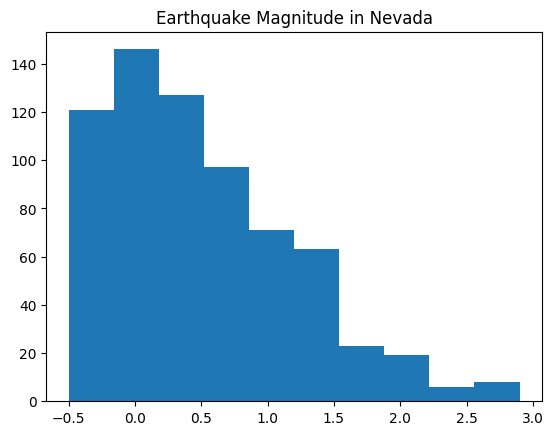

In [ ]:
plt.hist(nevada_earthquakes.mag)
plt.title('Earthquake Magnitude in Nevada')
plt.show()

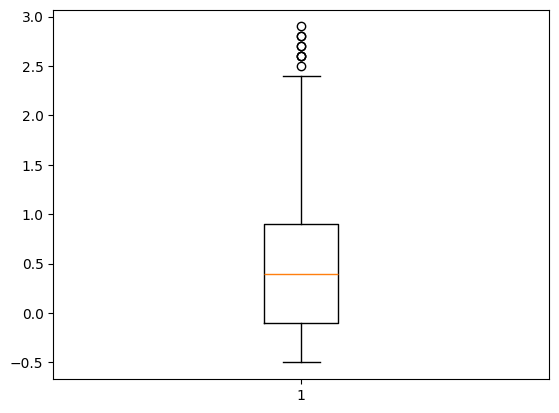

In [ ]:
plt.boxplot(nevada_earthquakes.mag)
plt.show()

>
    4. Add a column indicating whether the earthquake happened in a country or US state that is on the Ring of Fire. 
    Use Alaska, Antarctica (look for Antarctic), Bolivia,
    California, Canada, Chile, Costa Rica, Ecuador, Fiji, Guatemala, Indonesia, Japan, Kermadec Islands, Mexico (be careful not to select New Mexico), New Zealand,
    Peru, Philippines, Russia, Taiwan, Tonga, and Washington.

In [ ]:
df.parsed_place.str.contains('Alaska' or 'Antarctic').value_counts()

parsed_place
False    5667
True     3665
Name: count, dtype: int64

In [ ]:
ring_of_fire_places = ['Alaska', 'Antarctic', 'Bolivia',
    'California', 'Canada', 'Chile', 'Costa Rica', 'Ecuador', 'Fiji', 
    'Guatemala', 'Indonesia', 'Japan', 'Kermadec Islands', 'Mexico', 
    'New Zealand', 'Peru', 'Philippines', 'Russia', 'Taiwan', 'Tonga', 
    'Washington']

In [ ]:
def is_in_rof(place):
    for location in ring_of_fire_places:
        if location in place:
            return True
    return False

df['in_ring_of_fire'] = df['parsed_place'].apply(is_in_rof)

In [ ]:
df.head()

,mag,magType,place,parsed_place,tsunami,type,in_ring_of_fire
0,1.35,ml,"9km NE of Aguanga, CA",California,0,earthquake,True
1,1.29,ml,"9km NE of Aguanga, CA",California,0,earthquake,True
2,3.42,ml,"8km NE of Aguanga, CA",California,0,earthquake,True
3,0.44,ml,"9km NE of Aguanga, CA",California,0,earthquake,True
4,2.16,md,"10km NW of Avenal, CA",California,0,earthquake,True


>
    5. Calculate the number of earthquakes in the Ring of Fire locations and the number outside of them.

In [ ]:
df.in_ring_of_fire.value_counts(normalize=True)

in_ring_of_fire
True     0.77036
False    0.22964
Name: proportion, dtype: float64

In [ ]:
df.in_ring_of_fire.value_counts()

in_ring_of_fire
True     7189
False    2143
Name: count, dtype: int64

Earthquakes distribution
- 7189 (77%) ocorred in Ring of Fire
- 2143 (23%) occured outside the Ring of Fire

>
    Find the tsunami count along the Ring of Fire

In [ ]:
tsunami_in_rof = df[(df['in_ring_of_fire']) 
                       & (df['tsunami'] == 1)]

In [ ]:
tsunami_in_rof.shape[0]

45

45 tsunamis along the Ring of Fire